In [1]:
import numpy as np
import matplotlib.pyplot as plt
from recordtype import recordtype
import json

import dadrah.kfold_pipeline.kfold_string_constants as kstco

In [6]:
Parameters = recordtype('Parameters','qr_run_n, env_run_n')
params_x0 = Parameters(qr_run_n=412,
                      env_run_n=0)
params_x100 = Parameters(qr_run_n=612,
                      env_run_n=0)
kfold_n = 5

In [7]:
env_x0 = kstco.get_envelope_dir(params_x0) # load envelope path
env_x100 = kstco.get_envelope_dir(params_x100)

In [8]:
bin_idx, mu_idx, rmse_idx, min_idx, max_idx = range(5)

In [9]:
# read xsec0 envelope 
envelope_per_fold_x0 = {}
for k in range(1,kfold_n+2): # k: 1-6
    envelope_json_path = kstco.get_envelope_file(params_x0,k)
    ff = open(envelope_json_path)
    envelope_per_fold_x0['fold_{}'.format(k)] = json.load(ff)

In [10]:
# read xsec100 envelope 
envelope_per_fold_x100 = {}
for k in range(1,kfold_n+2): # k: 1-6
    envelope_json_path = kstco.get_envelope_file(params_x100,k)
    ff = open(envelope_json_path)
    envelope_per_fold_x100['fold_{}'.format(k)] = json.load(ff)

In [14]:
q_str = str(0.5)
fold_str = 'fold_{}'.format(2)

bins = np.asarray(envelope_per_fold_x0[fold_str][q_str])[:,bin_idx]
mu_x0 = np.asarray(envelope_per_fold_x0[fold_str][q_str])[:,mu_idx][bins<6000]
mu_x100 = np.asarray(envelope_per_fold_x100[fold_str][q_str])[:,mu_idx][bins<6000]

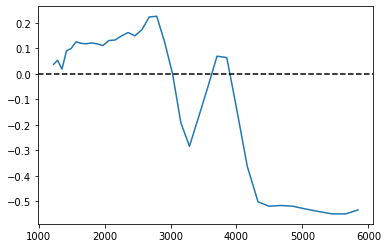

In [23]:
plt.plot(bins[bins<6000],((mu_x0-mu_x100)/mu_x0)*100)
plt.axhline(y=0, linestyle='--', c='k')